# 机器学习Intro

* 机器学习（深度学习）：把人类归纳经验的过程，转化为由计算机自己来归纳总结的过程。机器学习是一种通过利用数据，训练出模型，然后使用模型预测的一种方法
* 有监督学习 & 无监督学习：区别在于训练过程中是否使用数据真实的标签
* 模型训练本质：1）数据处理：主要包括数据清理、数据预处理、数据增强等，构建让模型使用的训练集和验证集；2）模型训练：确定网络结构，确定损失函数与设置优化方法；3）模型评估：使用各种评估指标来评估模型的好坏
* 模型训练部分：1）模型结构设计：例如机器学习中回归算法、SVM等，深度学习中的VGG、ResNet等；2）给定损失函数：损失函数衡量的是当前模型预测结果与真实标签之间的差距；3）给定优化方法：与损失函数搭配，更新模型中的参数

常见名词
* Epoch：用所有数据训练一遍就是一个Epoch
* Step：受硬件设备限制，训练时不会一次性读入所有数据，而是一次读入一部分进行训练（Step），每次读入的数据量就是batch_size

# Torchvision

## PyTorch中的数据读取

**Dataset类和DataLoader类**

### Dataset类

PyTorch 中的 Dataset 类是一个抽象类，它可以用来表示数据集

通过继承 Dataset 类来自定义数据集的格式、大小和其它属性，后面就可以供 DataLoader 类直接使用

在继承 Dataset 类时，至少需要重写以下几个方法：
* __init__()：构造函数，可自定义数据读取方法以及进行数据预处理
* __len__()：返回数据集大小
* __getitem__()：索引数据集中的某一个数据

In [ ]:
import torch
from torch.utils.data import Dataset

# 自定义一个名称为MyDataset的数据集（继承pytorch内置的Dataset类）
class MyDataset(Dataset):
    # 上文说的重写构造函数（输入2个tensor类型的参数：数据/数据集合，数据对应的标签/集合）
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor        
        self.target_tensor = target_tensor
        
    # 上文说的重写len方法：返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)  # 一般情况输进来的数据都是集合
    
    # 上文提到的重写getitem方法：基于索引，返回对应的数据及其标签，组合成1个元组返回
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [ ]:
# 生成数据集和标签集 （数据元素长度=标签元素长度）
data_tensor = torch.randn(10, 3)        # 10行3列数据，可以理解为10个元素，每个元素个一维的3个元素列表
target_tensor = torch.randint(2, (10,)) # 标签是0或1的10个元素   # 对应语法：torch.randint(low, high, size）

# 将数据封装成自定义数据集的Dataset
my_dataset = MyDataset(data_tensor, target_tensor)

# 调用方法：查看数据集大小
print('Dataset size:', len(my_dataset))

# 使用索引调用数据
print('tensor_data[0]: ', my_dataset[0])

###  DataLoader 类

在实际项目中，如果数据量很大，考虑到内存有限、I/O 速度等问题，在训练过程中不可能一次性的将所有数据全部加载到内存中，也不能只用一个进程去加载，所以就需要多进程、迭代加载，而 DataLoader 就是基于这些需要被设计出来的。

DataLoader 是一个迭代器，最基本的使用方法就是传入一个 Dataset 对象，它会根据参数 batch_size 的值生成一个 batch 的数据，节省内存的同时，它还可以实现多进程、数据打乱等处理。

```
from torch.utils.data import DataLoader
tensor_dataloader = DataLoader(dataset=xxx,  # 传入的数据集, 必须参数，必须是Dataset 类型
                     batch_size=x,  # int 类型，每个 batch 有多少个样本
                     shuffle=x,    # bool 类型，在每个 epoch 开始的时候，是否对数据进行重新打乱；
                     num_workers=x)  # int 类型，加载数据的进程数，0 意味着所有的数据都会被加载进主进程，默认为 0

```

In [ ]:
from torch.utils.data import DataLoader

# 创建一个迭代器，数据集是上文自定义的数据集MyDataset，每次只导入2个大小的数据
tensor_dataloader = DataLoader(dataset=my_dataset, # 传入的数据集, 必须参数
                               batch_size=2,       # 输出的batch大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=0)      # 进程数, 0表示只有主进程

# 输出所有：以循环形式输出每次迭代的所有数据（意味着：一共10个元素，5此就结束了）
for data, target in tensor_dataloader: 
    print(data, target)
       
# 输出一个batch
print('One batch tensor data: ', iter(tensor_dataloader).__next__())

## Torchvision介绍 

Torchvision 是一个和 PyTorch 配合使用的 Python 包。它不只提供了一些常用数据集，还提供了几个已经搭建好的经典网络模型，以及集成了一些图像数据处理方面的工具，主要供数据预处理阶段使用。简单地说，**Torchvision 库就是常用数据集 + 常见网络模型 + 常用图像处理方法**。

In [ ]:
import torchvision

### 数据读取—MNIST数据集 测试

In [ ]:
import torchvision
mnist_dataset = torchvision.datasets.MNIST(root='./data',
                                       train=True,
                                       transform=None,
                                       target_transform=None,
                                       download=True)

In [ ]:
# 转化成list
mnist_dataset_list = list(mnist_dataset)

In [ ]:
# 显示数据列表中的图片
display(mnist_dataset_list[0][0])
print("Image label is:", mnist_dataset_list[0][1]) 

In [ ]:
print(len(mnist_dataset_list))

### 数据处理

torchvision.transforms（图像处理工具）基本介绍

Torchvision 库中的torchvision.transforms包中提供了常用的图像操作，包括对 Tensor 及 PIL Image 对象的操作，例如随机切割、旋转、数据类型转换等等

按照torchvision.transforms 的功能，大致分为以下几类：数据类型转换、对 PIL.Image 和 Tensor 进行变化和变换的组合

#### 数据类型转换

* transforms.ToTensor()

将 PIL.Image 或 Numpy.ndarray 格式的数据转化为 Tensor 格式。

* transforms.ToPILImage(mode=None)

将 Tensor 或 Numpy.ndarray 格式的数据转化为 PIL.Image 格式。其中参数 mode 代表 PIL.Image 的模式，如果 mode 为 None（默认值），则根据输入数据的维度进行推断：输入为 3 通道：mode 为’RGB’；输入为 4 通道：mode 为’RGBA’；输入为 2 通道：mode 为’LA’；输入为单通道：mode 根据输入数据的类型确定具体模式

In [ ]:
from PIL import Image
from torchvision import transforms 

img = Image.open('source/jikeshijian_logo.png') 
display(img)
print(type(img)) # PIL.Image.Image是PIL.JpegImagePlugin.JpegImageFile的基类

# PIL.Image转换为Tensor
img_tensor = transforms.ToTensor()(img)
print(type(img_tensor))
print(img_tensor.shape)

# Tensor转换为PIL.Image
img2 = transforms.ToPILImage()(img_tensor)  #PIL.Image.Image
print(type(img2))

#### 对PIL.Image和Tensor进行变换

torchvision.transforms 提供了丰富的图像变换方法，例如：改变尺寸、剪裁、翻转等。并且这些图像变换操作可以接收多种数据格式，不仅可以直接对 PIL 格式的图像进行变换，也可以对 Tensor 进行变换，无需再去做额外的数据类型转换

**Resize**

将输入的PIL Image或Tensor尺寸调整为给定的尺寸，具体定义为：

torchvision.transforms.Resize(size, interpolation=2)(PIL Image对象/tensor对象)

size：期望输出的尺寸。如果 size 是一个像 (h, w) 这样的元组，则图像输出尺寸将与之匹配。如果 size 是一个 int 类型的整数，图像较小的边将被匹配到该整数，另一条边按比例缩放。

interpolation：插值算法，int 类型，默认为 2，表示 PIL.Image.BILINEAR。

In [ ]:
from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('source/jikeshijian_logo.png') 
print('原图大小:',orig_img.size)
display(orig_img)

# Resize操作后的图
# 定义一个Resize操作
resize_img_oper = transforms.Resize((80), interpolation=2)
img = resize_img_oper(orig_img)
print('resize图大小:',img.size)
display(img)

**剪裁**

torchvision.transforms提供了多种剪裁方法，例如中心剪裁、随机剪裁、四角和中心剪裁等

* 中心裁剪：在中心裁剪指定的 PIL Image 或 Tensor

torchvision.transforms.CenterCrop(size)(PIL Image对象/tensor对象)
size 表示期望输出的剪裁尺寸。如果 size 是一个像 (h, w) 这样的元组，则剪裁后的图像尺寸将与之匹配。如果 size 是 int 类型的整数，剪裁出来的图像是 (size, size) 的正方形。

* 随机剪裁：就是在一个随机位置剪裁指定的 PIL Image 或 Tensor

torchvision.transforms.RandomCrop(size, padding=None)(PIL Image对象/tensor对象)

* FiveCrop：将给定的 PIL Image 或 Tensor ，分别从四角和中心进行剪裁，共剪裁成五块

torchvision.transforms.FiveCrop(size)(PIL Image对象/tensor对象)

In [ ]:
from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('source/jikeshijian_logo.png') 
display(orig_img)

# 中心剪裁
img1 = transforms.CenterCrop((60,100))(orig_img)
display(img1)

# 随机剪裁
img2 = transforms.RandomCrop((80,80))(orig_img)
display(img2)

# 四角和中心剪裁
imgs = transforms.FiveCrop((60,70))(orig_img)
for img in imgs:
    display(img)

**翻转**

torchvision.transforms提供了两种翻转操作，分别是：以某一概率随机水平翻转图像和以某一概率随机垂直翻转图像。

* 以概率 p 随机水平翻转图像

torchvision.transforms.RandomHorizontalFlip(p=0.5)(PIL Image对象/tensor对象)

* 以概率 p 随机垂直翻转图像

torchvision.transforms.RandomVerticalFlip(p=0.5)(PIL Image对象/tensor对象)
p 表示随机翻转的概率值，默认为 0.5。

随机翻转，是为数据增强提供方便。如果想要必须执行翻转操作的话，将 p 设置为 1 即可。

In [ ]:
from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('source/jikeshijian_logo.png') 
display(orig_img)

# 水平翻转
img_L = transforms.RandomHorizontalFlip(p=1)(orig_img)
display(img_L)

# 垂直翻转
img_V = transforms.RandomVerticalFlip(p=1)(orig_img)
display(img_V)

#### 只对Tensor进行变换

目前版本的 Torchvision（v0.10.0）对各种图像变换操作已经基本同时支持 PIL Image 和 Tensor 类型，因此只针对 Tensor 的变换操作很少，只有 4 个，分别是 LinearTransformation（线性变换）、Normalize（标准化）、RandomErasing（随机擦除）、ConvertImageDtype（格式转换）。这里重点看最常用的一个操作：标准化

**标准化**

标准化是指每一个数据点减去所在通道的平均值，再除以所在通道的标准差，数学的计算公式如下：

output=(input−mean)/std

说明1：三维数据的前2维，可以说是长宽（面积大小），第三维习惯称之为通道

说明2：对图像进行标准化，就是对图像的每个通道利用均值和标准差进行正则化。这样做的目的，是为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果。

说明3：标准化是一个常规做法，可以理解为无脑进行标准化后再训练的效果，大概率要好于不进行标准化。

torchvision.transforms中对 Tensor 的标准化操作函数

torchvision.transforms.Normalize(mean, std, inplace=False)(tensor对象)

mean：表示各通道的均值；

std：表示各通道的标准差；

inplace：表示是否原地操作，默认为否。

In [ ]:
from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('source/jikeshijian_logo.png') 
display(orig_img)

# 图像转化为Tensor
img_tensor = transforms.ToTensor()(orig_img)

# 标准化

# 定义标准化操作
tensor_norm = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))(img_tensor)

# 再把标准化后的Tensor转化为图像
img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

#### 变换的组合 

前面介绍过的所有操作都可以用 Compose 类组合起来，进行连续操作

Compose 类是将多个变换组合到一起，它的定义如下: 

torchvision.transforms.Compose(transforms)

transforms 是一个 Transform 对象的列表，表示要组合的变换列表

In [ ]:
# 分析：需要用到了Resize操作、RandomCrop操作

from PIL import Image
from torchvision import transforms 

# 原图
orig_img = Image.open('source/jikeshijian_logo.png') 
display(orig_img)

# 定义组合操作
composed = transforms.Compose([transforms.Resize((200, 200)),
                               transforms.RandomCrop(80)])

# 组合操作后的图
img = composed(orig_img)
display(img)

#### 综合运用

In [ ]:
from torchvision import transforms
from torchvision import datasets

# 定义一个transform
my_transform = transforms.Compose([transforms.ToTensor(),                   # 将读取来的图片数据转成tensor，方便后续直接神经网络学习
                                   transforms.Normalize((0.5), (0.5))
                                  ])

# 读取MNIST数据集 同时做数据变换
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=my_transform,
                               target_transform=None,
                               download=False)

# 查看变换后的数据类型
mnist_dataset_list = list(mnist_dataset)
print(mnist_dataset_list[0])

## Torchvision中常见的网络模型

torchvision.models 模块中包含了常见网络模型结构的定义，这些网络模型可以解决以下四大类问题：图像分类、图像分割、物体检测和视频分类。

### 模型实例化

In [ ]:
import torchvision.models as models                    # 如上文所说，torcchvision常用的经典网络模型在models中
googlenet = models.googlenet(pretrained=True)          # 实例化，创建对象（直接导入训练好的模型来使用）
# googlenet = models.googlenet()                       # 这样实例化对象得到的仅仅是一个网络结构，里面的参数都是随机初始化的，需要经过训练之后才能使用，并不能直接用于预测。

### 模型微调

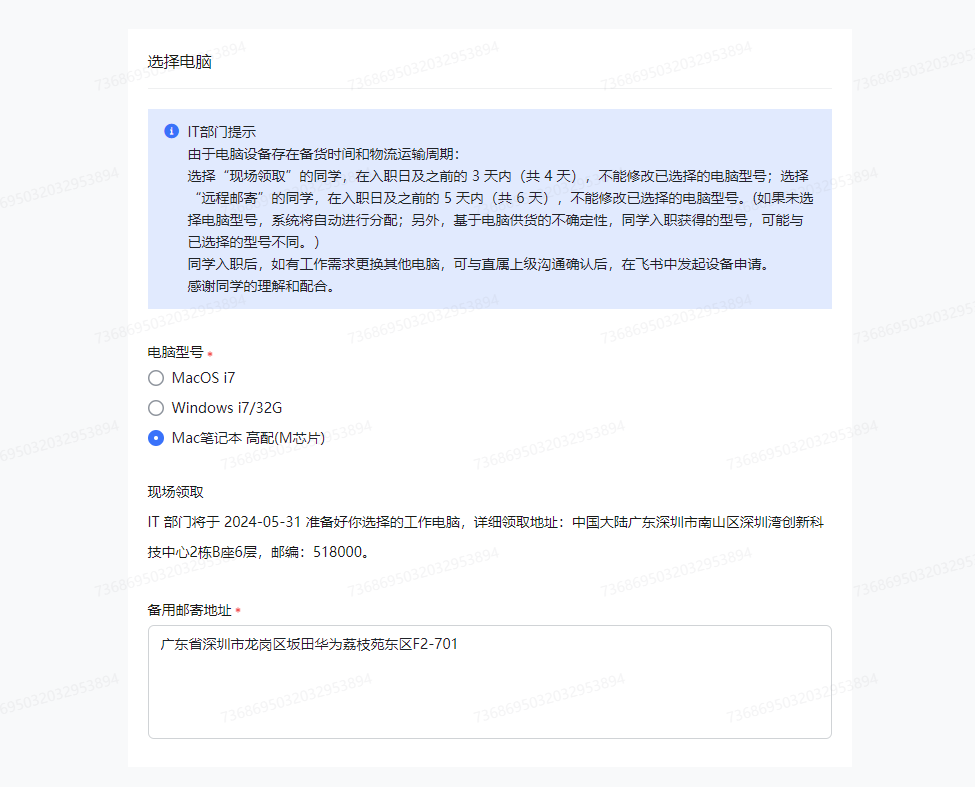模型微调：简单来说就是先在一个比较通用、宽泛的数据集上进行大量训练得出了一套参数，然后再使用这套预训练好的网络和参数，在自己的任务和数据集上进行训练。

使用经过预训练的模型，要比使用随机初始化的模型训练效果更好，更容易收敛，并且训练速度更快，在小数据集上也能取得比较理想的效果。

为什么要进行模型微调：假设你的老板给布置了一个有关于图片分类的任务，数据集是关于狗狗的图片，让你区分图片中狗的种类，例如金毛、柯基、边牧等等。问题是数据集中狗的类别很多，但数据却不多。你发现从零开始训练一个图片分类模型，但这样模型效果很差，并且很容易过拟合。例如上面已经实例化一个 GoogLeNet 模型对象，再给他自己的数据集，重新训练网络最后的分类层，即可实现微调效果。这就是所谓的“fine-tuning”方法。

In [ ]:
import torch
import torchvision.models as models

# 加载预训练模型
googlenet = models.googlenet(pretrained=True)

# 打印查看模型全连接层参数
fc=googlenet.fc
print(fc)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print("fc_in_features:", fc_in_features)

# 提取分类层的输出参数
fc_out_features = googlenet.fc.out_features
print("fc_out_features:", fc_out_features)

# 修改预训练模型的输出分类数
googlenet.fc = torch.nn.Linear(fc_in_features, 10)

# 再次打印查看模型全连接层参数
fc=googlenet.fc
print(fc)

## torchvision其他常见函数

### make_grid

作用是将若干幅图像拼成在一个网格中，它的定义如下

torchvision.utils.make_grid(tensor, nrow=8, padding=2)

* tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，其形状应是 (B x C x H x W)；如果输入类型是列表，列表中元素应为相同大小的图片。
* nrow：表示一行放入的图片数量，默认为 8。
* padding：子图像与子图像之间的边框宽度，默认为 2 像素

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),         # 加载的图片，此处转为tensor类型
                               target_transform=None,
                               download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)

# 创建迭代器, 每个元素都是32个大小
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = data_iter.__next__()
print('一捆图片大小:',img_tensor.shape,'一捆图片标签大小:',len(label_tensor))

# 将32张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)   # tensor类型转换为IMG
display(grid_img)

### save_img

保存模型输出的图片时，需要将 Tensor 类型的数据转化为图片类型才能进行保存，Torchvision 提供了 save_image 函数，能够直接将 Tensor 保存为图片，即使 Tensor 数据在 CUDA 上，也会自动移到 CPU 中进行保存。

torchvision.utils.save_image(tensor, fp, **kwargs)
* tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，直接将 Tensor 保存；如果输入类型是列表，内在原理是先调用 make_grid 函数生成一张图片的 Tensor，然后再保存。
* fp：保存图片的文件名；
* **kwargs：见make_grid 函数中的参数。

In [ ]:
# 输入为一张图片的tensor 直接保存
torchvision.utils.save_image(grid_tensor, 'grid.jpg')

# 输入为List，内部原理是先调用grid_img函数后保存
torchvision.utils.save_image(img_tensor, 'grid2.jpg', nrow=5, padding=2)

# 卷积

卷积同样是先对物体照片进行特征提取，经过监督训练/强化训练后，后面可以识别对应物体（还是特征提取再匹配）

**稀疏连接**与**平移不变性**是卷积的两个重要特点：
* 稀疏连接：稀疏连接可以让学习的参数变得很少。稀疏连接体现了神经网络每一层的神经元节点只响应前一层局部范围内的神经元的特点，处于深层的网络间接的连接了全部或者大部分的图像。网络第一层里每个神经元的视野是由卷积核大小决定，越往后的网络层中的神经元的视野会越大

* 平移不变性：不关心物体出现在图像中什么位置，目标发生了变换,依然可以识别出来

In [ ]:
import torch
import torch.nn as nn

print('001 创建上文例子中的（4，4，1）大小的输入特征图---------------------------------')
input_feat = torch.tensor([[4, 1, 7, 5], [4, 4, 2, 5], [7, 7, 2, 4], [1, 0, 2, 4]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(input_feat)
print(input_feat.shape)

print('002 创建2x2卷积核-------------padding 为’same’----------------------------------')
conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=False)
# 默认情况随机初始化参数
print(conv2d.weight)
print(conv2d.bias)

# 为了验证本文中的例子，对卷积核的参数进行干预
kernels = torch.tensor([[[[1, 0], [2, 1]]]], dtype=torch.float32)
conv2d.weight = nn.Parameter(kernels, requires_grad=False)
print(conv2d.weight)
print(conv2d.bias)

print('003 输出结果--------------------------------------------------------------------')
output = conv2d(input_feat)
print(output)

# 损失函数、计算梯度、优化方法

损失函数是一把衡量模型学习效果的尺子，甚至可以说，训练模型的过程，实际就是优化损失函数值的过程，不断的训练模型调整模型参数，最终能让损失函数值很小并趋于稳定。

* 损失函数（loss fuction)--单个样本点的误差

* 代价函数（cost function）--所有样本点的误差

在实际的应用中，并不会严格区分损失函数和代价函数。只需要知道，损失函数是单个样本点的误差，代价函数是所有样本点的误差。

In [ ]:
import LeNet #假定我们使用的模型叫做LeNet，首先导入模型的定义类
import torch.optim as optim #引入PyTorch自带的可选优化函数

# 定义并实列化模型
net = LeNet() #声明一个LeNet的实例

# 选择合适的损失函数
criterion = nn.CrossEntropyLoss() #声明模型的损失函数，使用的是交叉熵损失函数

# 选择合适的优化方法（常用梯度优化）
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# 声明优化函数，我们使用的就是之前提到的SGD，优化的参数就是LeNet内部的参数，lr即为之前提到的学习率

# 下面开始训练
for epoch in range(30): #设置要在全部数据上训练的次数
    for i, data in enumerate(traindata):
        #data就是我们获取的一个batch size大小的数据
        inputs, labels = data #分别得到输入的数据及其对应的类别结果

        # 首先要通过zero_grad()函数把梯度清零，不然PyTorch每次计算梯度会累加，不清零的话第二次算的梯度等于第一次加第二次的
        optimizer.zero_grad()

        # 获得模型的输出结果，也即是当前模型学到的效果
        outputs = net(inputs)

        # 获得输出结果和数据真正类别的损失函数
        loss = criterion(outputs, labels)

        # 算完loss之后进行反向梯度传播，这个过程之后梯度会记录在变量中
        loss.backward()
        
        # 用计算的梯度去做优化
        optimizer.step()

# 一站式构建网络

## 训练数据准备

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
x_train = np.random.randint(low=-10, high=10, size=30)

y_target = [w * x + b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_target,'bo')

## 构建模型

### 创建训练数据

In [ ]:
# 创建训练数据----------------------------------------------------------------01
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
x_train = np.random.randint(low=-10, high=10, size=30)

y_target = [w * x + b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_target,'bo')

### 定义模型

In [ ]:
#  定义模型结果部分----------------------------------------------------------02
import torch
from torch import nn

class LinearModel(nn.Module):
  def __init__(self):                            # 模型的参数放在初始化中进行生成
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):                      # 模型的计算/卷积，是在前向传播方法中实现
    return (input * self.weight) + self.bias

步骤：
* 必须继承 nn.Module 类。
* nn.Module 是所有神经网络模块的基类。当咱们自己要设计一个网络结构的时候，就要继承该类。因为这个类还有很多方法，直接继承即可，不用重写（比如这里面重写了正向传播，还有反向传播就没重写）。其实 Torchvison 中的那些模型，也都是通过继承 nn.Module 模块来构建网络模型的。
* 重写 __init__() 方法。必须调用父类的构造方法才可以。通常来说要把有需要学习的参数的层放到构造函数中，例如，例子中的 weight 与 bias，还有之前学习的卷积层初始化。 __init__() 中使用了 nn.Parameter()，它主要的作用就是作为 nn.Module 中可训练的参数使用。
* forward() 是必须重写的方法。看函数名也可以知道，它是用来定义这个模型是如何计算输出的，也就是前向传播。这个例子，就是获得最终输出 y=weight * x+bias 的计算结果。对于一些不需要学习参数的层，一般来说可以放在这里。
* 需要注意的是，模块本身是 callable 的，当调用它的时候，就是执行 forward 函数，也就是前向传播。

序列化构建

In [ ]:
from torch import nn
net = nn.Sequential(nn.Linear(5, 3),nn.Linear(3,2))
print(net)

### 实例化模型并训练

In [ ]:
# 实列化模型对象------------------------------------------------------------03
model = LinearModel()

# 打印初始模型参数
print('---Before training---')
for parameter in model.named_parameters(): 
    print(parameter)

# 定义好损失函数-----------------------------------------------------------04
loss_Function=nn.MSELoss()  # 实列化一个损失函数

# 定义优化方法-------------------------------------------------------------05
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

# 模型训练部分-------------------------------------------------------------06
y_train = torch.tensor(y_target, dtype=torch.float32)

for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()   # 每次反向传播前，要记得提取清零
    loss.backward()
    optimizer.step()
    
# 训练结束后，打印模型参数
print('---After training---')
for parameter in model.named_parameters(): 
    print(parameter)

print('---Another way to show parameters---')
print(model.state_dict())

### 模型保存

**仅保存网络参数**

In [ ]:
# 模型保存
# 仅保存网络参数
torch.save(model.state_dict(), './selfModel/linear_model.pth')

**保存网络结构和参数**

In [ ]:
# 保存网络结构和参数
torch.save(model, './selfModel/linear_model_with_arc.pth')

### 模型加载

**读取网络参数**

In [ ]:
import torch
# 自定义的网络模型/torchvision提供的网络模型

# 先实例化定义好的网络结构
linear_model = LinearModel()

# 加载保存的参数
linear_model.load_state_dict(torch.load('./selfModel/linear_model.pth'))

# 因为有些层（例如，Dropout 与 BN）在训练时与评估时的状态是不一样的，当进入评估时要执行 model.eval()，模型才能进入评估状态
linear_model.eval()

# 查看参数是否加载过来
print(linear_model.state_dict())

**读取网络结构和参数**

In [ ]:
# # 保存整个模型
# torch.save(model, './selfModel/linear_model_with_arc.pth')

# 加载模型，不需要创建网络了
linear_model_2 = torch.load('./selfModel/linear_model_with_arc.pth')
linear_model_2.eval()

# 查看参数是否加载过来
print(linear_model.state_dict())

## 使用torchvision中封装的经典模型进行训练

### 训练数据准备

In [ ]:
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import DataLoader

# 先定义好数据处理/增加模型：裁剪、图片转成tensor、标准化
transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# 读取数据
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       transform=transform,
                                       target_transform=None,
                                       download=True)

# 批加载
dataloader = DataLoader(dataset=cifar10_dataset, # 传入的数据集, 必须参数
                               batch_size=32,       # 输出的batch大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=2)      # 进程数, 0表示只有主进程

### 验证数据集内容

In [ ]:
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       target_transform=None,
                                       download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=cifar10_dataset,
                               batch_size=32)

# 使用迭代器，一次取一个，1个是32个大小
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = data_iter.__next__()

# 打印输出
print(img_tensor.shape)
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=16, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

### 模型训练

In [17]:
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import DataLoader
from torch import nn

# 数据准备---------------------------------------------------------------------------------01
# 先定义好数据处理/增加模型：裁剪、图片转成tensor、标准化
transform = transforms.Compose([
    transforms.RandomResizedCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# 读取数据
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       transform=transform,
                                       target_transform=None,
                                       download=True)

# 批加载
dataloader = DataLoader(dataset=cifar10_dataset, # 传入的数据集, 必须参数
                               batch_size=32,       # 输出的batch大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=2)      # 进程数, 0表示只有主进程

# 模型设计加载------------------------------------------------------------------------------02
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

# 模型微调---------------------------------------------------------------------------------03
# 提取分类层的输入参数
fc_in_features = alexnet.classifier[6].in_features

# 修改预训练模型的输出分类数
alexnet.classifier[6] = torch.nn.Linear(fc_in_features, 10)


# 损失函数选择-----------------------------------------------------------------------------04
loss_Function=nn.CrossEntropyLoss()  # 实列化一个损失函数

# 优化方法选择-----------------------------------------------------------------------------05
optimizer = torch.optim.SGD(alexnet.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

# 正式数据带入训练-------------------------------------------------------------------------06

# 训练1个Epoch,全量数据要搞1次数循环训练,次数太多，耗费时间太长
count=0
for epoch in range(1):  
    for i_dataloader in dataloader:    # dataloader其实就是一个列表，每个元素32个大小，（10000/32=313）个  i_dataloader      
        img_input_list=i_dataloader[0]
        img_target_list = i_dataloader[1]
        # print(img_target)
        output_list=alexnet(img_input_list)
        count=count+1
        
        # 使用交叉熵损失函数
        loss = nn.CrossEntropyLoss()(output_list, img_target_list)
        print('Epoch {}, Loss {},第{}个batch'.format(epoch + 1 , loss,count))
        
        #每次反向传播前梯度清零
        alexnet.zero_grad()
        
        # 反向传播
        loss.backward()
        
        # 优化
        optimizer.step()

Epoch 1, Loss 1.2363594770431519,第311个batch
Epoch 1, Loss 1.1440852880477905,第312个batch
Epoch 1, Loss 1.5977140665054321,第313个batch


# 可视化工具

## TensorboardX

需要创建一个 SummaryWriter 的实例，然后再使用add_scalar方法或add_image方法，将数字或图片记录到 SummaryWriter 实例中
在浏览器中输入：http://localhost:6006/

In [1]:
!pip install tensorboard

In [19]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

# 创建一个SummaryWriter的实例
writer = SummaryWriter()

# 使用add_scalar方法
for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)       # 自定义名称Loss/train,并可视化监控
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

    
# 使用add_image方法    
# 构建一个100*100，3通道的img数据    
img = np.zeros((3, 100, 100))
img[0] = np.arange(0, 10000).reshape(100, 100) / 10000
img[1] = 1 - np.arange(0, 10000).reshape(100, 100) / 10000

writer.add_image('my_image', img, 0)

writer.close()

ModuleNotFoundError: No module named 'tensorboard'

模型训练实例

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

# 创建训练数据----------------------------------------------------------------01
w = 2
b = 3
x_train = np.random.randint(low=-10, high=10, size=30)
y_target = [w * x + b + random.randint(0,2) for x in x_train]
# plt.plot(x_train, y_target,'bo')


#  定义模型结果部分----------------------------------------------------------02
import torch
from torch import nn
class LinearModel(nn.Module):
  def __init__(self):                            # 模型的参数放在初始化中进行生成
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):                      # 模型的计算/卷积，是在前向传播方法中实现
    return (input * self.weight) + self.bias


# 实列化模型对象------------------------------------------------------------03
model = LinearModel()


# 定义好损失函数-----------------------------------------------------------04
loss_Function=nn.MSELoss()  # 实列化一个损失函数

# 定义优化方法-------------------------------------------------------------05
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)


# 模型训练部分-------------------------------------------------------------06
# 实例化TensorboardX-writer
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

y_train = torch.tensor(y_target, dtype=torch.float32)

for i_step in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()   # 每次反向传播前，要记得提取清零
    loss.backward()
    optimizer.step()
    
    writer.add_scalar('Loss/train', loss, i_step )   # 调用可视化方法

## Visdom

启动成功后，在浏览器中输入“http://127.0.0.1:8097/”，进入 Visdom 的主界面

In [2]:
!pip install visdom

     ---------------------------------------- 1.4/1.4 MB 19.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408312 sha256=9214068f05275e0aec8541d836c9065a9a32f44ddd6534a80052c3b71f840831
  Stored in directory: c:\users\huawei\appdata\local\pip\cache\wheels\d7\94\e8\9e718f98bc717d1e6530d59d46e23996cc60cf2a28f1937ed4
Successfully built visdom


In [ ]:
from visdom import Visdom
import numpy as np
import time

# 第一步：将窗口类实例化
viz = Visdom() 

# 第二步：创建窗口并初始化
viz.line([0.], [0], win='train_loss', opts=dict(title='train_loss'))

for n_iter in range(10):
    # 随机获取loss值
    loss = 0.2 * np.random.randn() + 1
    
    # 第三步：监听，并更新窗口图像
    viz.line([loss], [n_iter], win='train_loss', update='append')  # win 窗口名称
    time.sleep(0.5)

# 同步：图像的更新  100*100 3通道
img = np.zeros((3, 100, 100))
img[0] = np.arange(0, 10000).reshape(100, 100) / 10000
img[1] = 1 - np.arange(0, 10000).reshape(100, 100) / 10000

# 可视化图像
viz.image(img)